In [1]:
import pandas as pd
import numpy as np
import math
import os
from matplotlib import pyplot as plt
import matplotlib as mpl
import sys
from scipy.interpolate import griddata
from tqdm import tqdm
# sys.path.append('/Users/jiarong/Google Drive/codes/jiarongw-postprocessing/functions')
sys.path.append('/projects/DEIKE/jiarongw/jiarongw-postprocessing/jupyter_notebook/functions/')
from fio import readin
# plt.style.use('/projects/DEIKE/jiarongw/jiarongw-postprocessing/media/matplotlib/stylelib/pof.mplstyle')
plt.style.use('/projects/DEIKE/jiarongw/jiarongw-postprocessing/media/matplotlib/stylelib/jfm.mplstyle')

In [11]:
def read (filepath='/projects/DEIKE/jiarongw/multilayer/stokes/stokes_8_20_Htheta0.51/field_t5/', pre='eta_matrix_', index=0, N=512):
    filename = filepath + pre + '%g' %index
    f = np.fromfile(filename, dtype=np.float32)
    f = f.reshape(N+1,N+1); f = f[1:,1:]
    return f

class Case(object):
    """ This class defines methods specific to cases.
        Attributes: 
            self.NL 
    """
    def __init__(self, NL=20, LEVEL=8, path='/projects/DEIKE/jiarongw/multilayer/stokes/stokes_8_20_Htheta0.51/'):
        self.NL = NL 
        self.path = path 
        self.LEVEL = LEVEL
    
    def read_t(self, suffix='_matrix', t=5):
        h_ensem = []; ux_ensem = []; uy_ensem = []; uz_ensem = []
        folder = self.path 
        N = 2**self.LEVEL
        for l in range (0,self.NL):
            h = read(filepath=folder, pre='h%s_t%g_l' %(suffix,t), index=l, N=N)
            ux = read(filepath=folder, pre='ux%s_t%g_l' %(suffix,t), index=l, N=N)
            uy = read(filepath=folder, pre='uy%s_t%g_l' %(suffix,t), index=l, N=N)
            uz = read(filepath=folder, pre='uz%s_t%g_l' %(suffix,t), index=l, N=N)
            h_ensem.append(h)
            ux_ensem.append(ux)
            uy_ensem.append(uy)
            uz_ensem.append(uz)
        """ axis0-z; axis1-x; aixs2-y"""
        self.h_ensem = np.array (h_ensem)
        self.ux_ensem = np.array (ux_ensem)
        self.uy_ensem = np.array (uy_ensem)
        self.uz_ensem = np.array (uz_ensem)
        return (self.h_ensem, self.ux_ensem, self.uy_ensem, self.uz_ensem)

In [25]:
case_field1 = Case(NL=15, LEVEL=9, path='/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.03_RE40000_9_15_rand2_Htheta0.503/restart/field/') # Seems that the case got deleted
h_ensem1, ux_ensem1, uy_ensem1, uz_ensem1 = case_field1.read_t(suffix='_matrix_before', t=120.1)
h_ensem2, ux_ensem2, uy_ensem2, uz_ensem2 = case_field1.read_t(suffix='_matrix_after', t=120.12)
h_ensem3, ux_ensem3, uy_ensem3, uz_ensem3 = case_field1.read_t(suffix='_matrix', t=120.2)


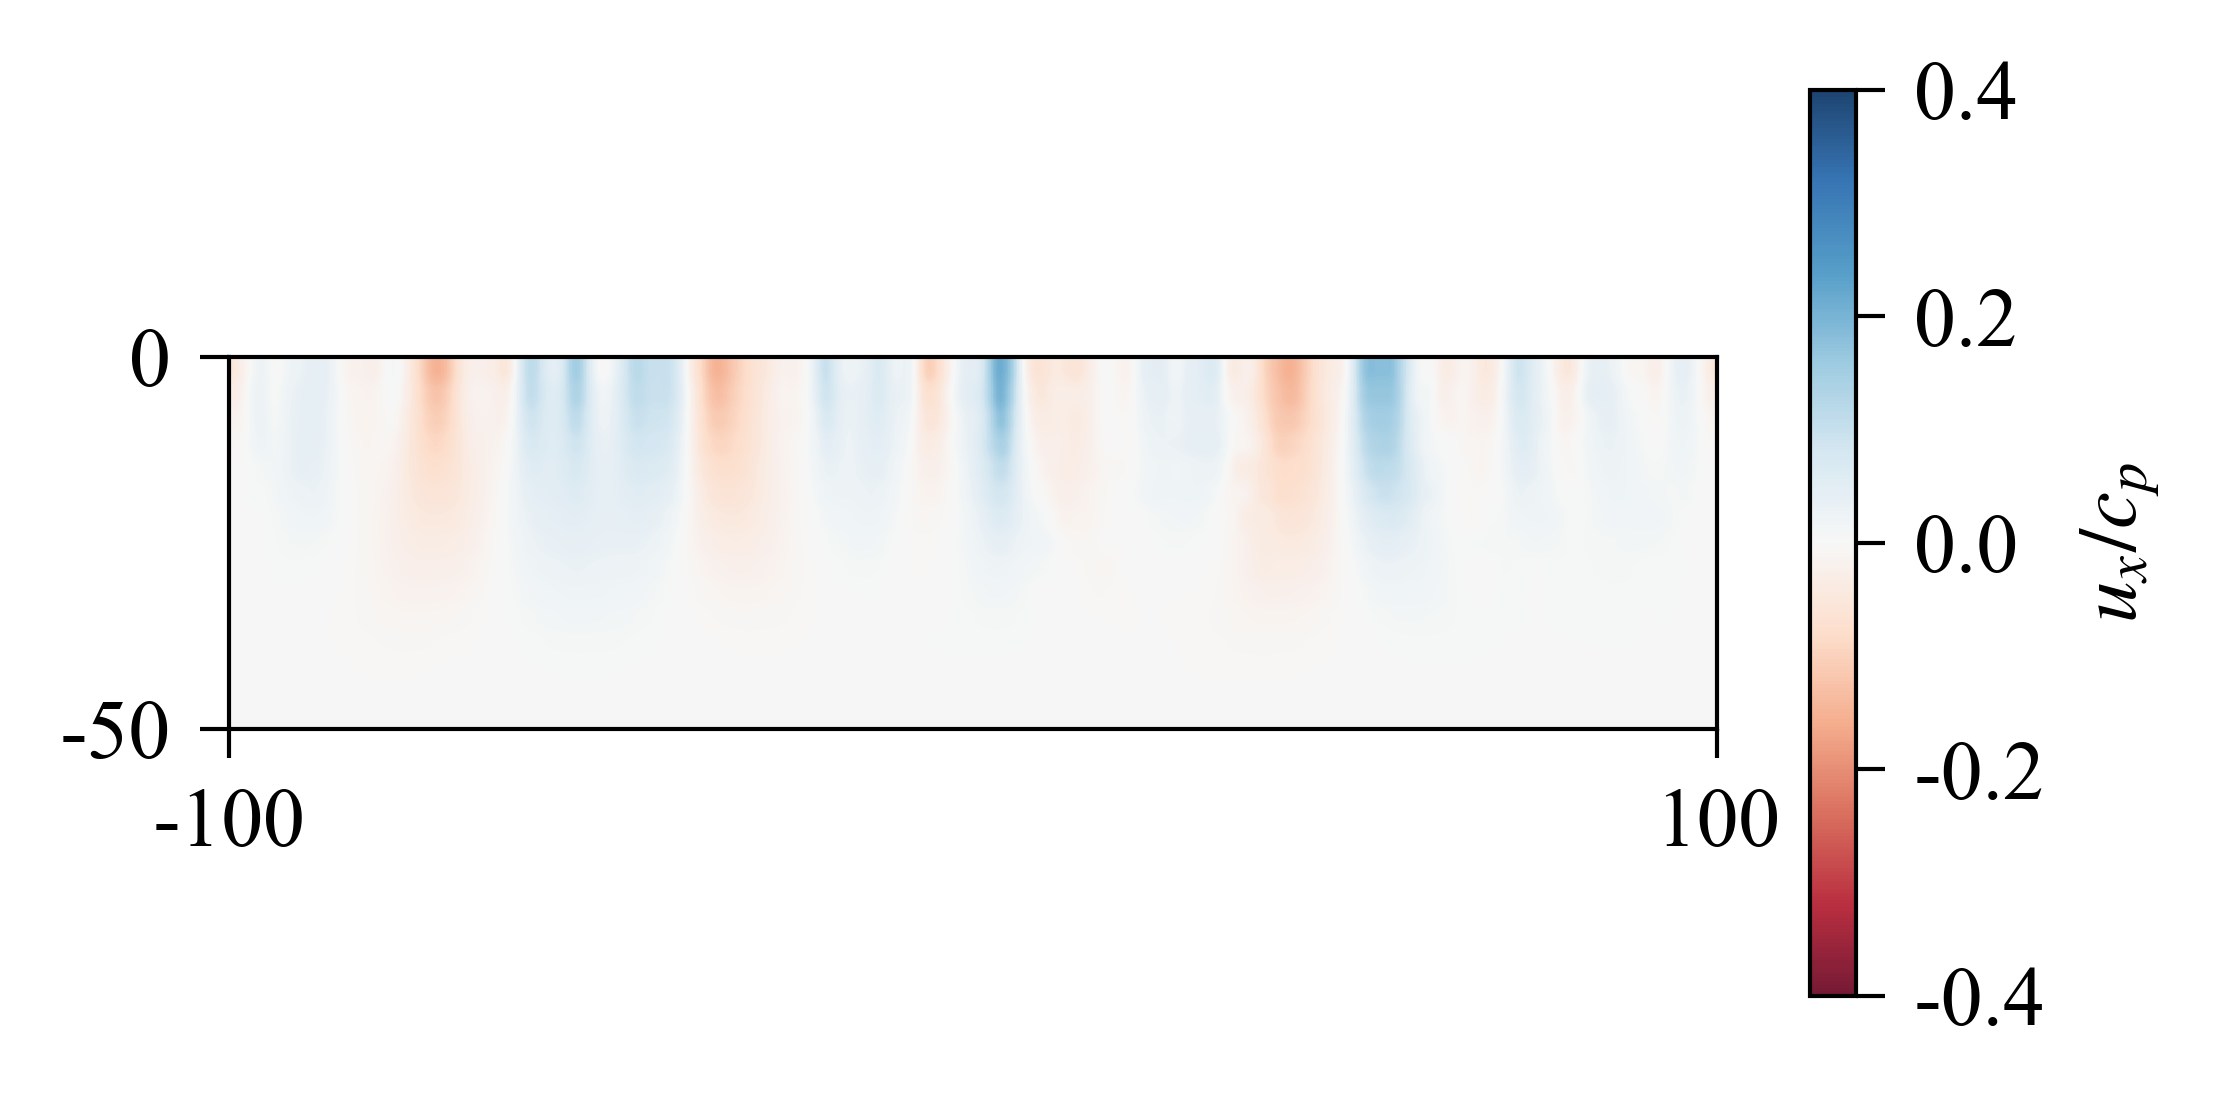

In [23]:
L = 200; H = 50
fig = plt.figure(figsize=[4,2]); ax = plt.gca()
kp = 2*np.pi/L*5; cp = (9.8/kp)**0.5 
image = ax.imshow((ux_ensem1[::-1,:,30])/cp, extent=[-L/2,L/2,-H,0], vmax=0.4, vmin=-0.4, cmap='RdBu', alpha=0.9)
ax.set_xticks([-L/2,L/2]); ax.set_yticks([-H,0])
cbar = plt.colorbar(image)
cbar.set_label(r'$u_x/c_p$')

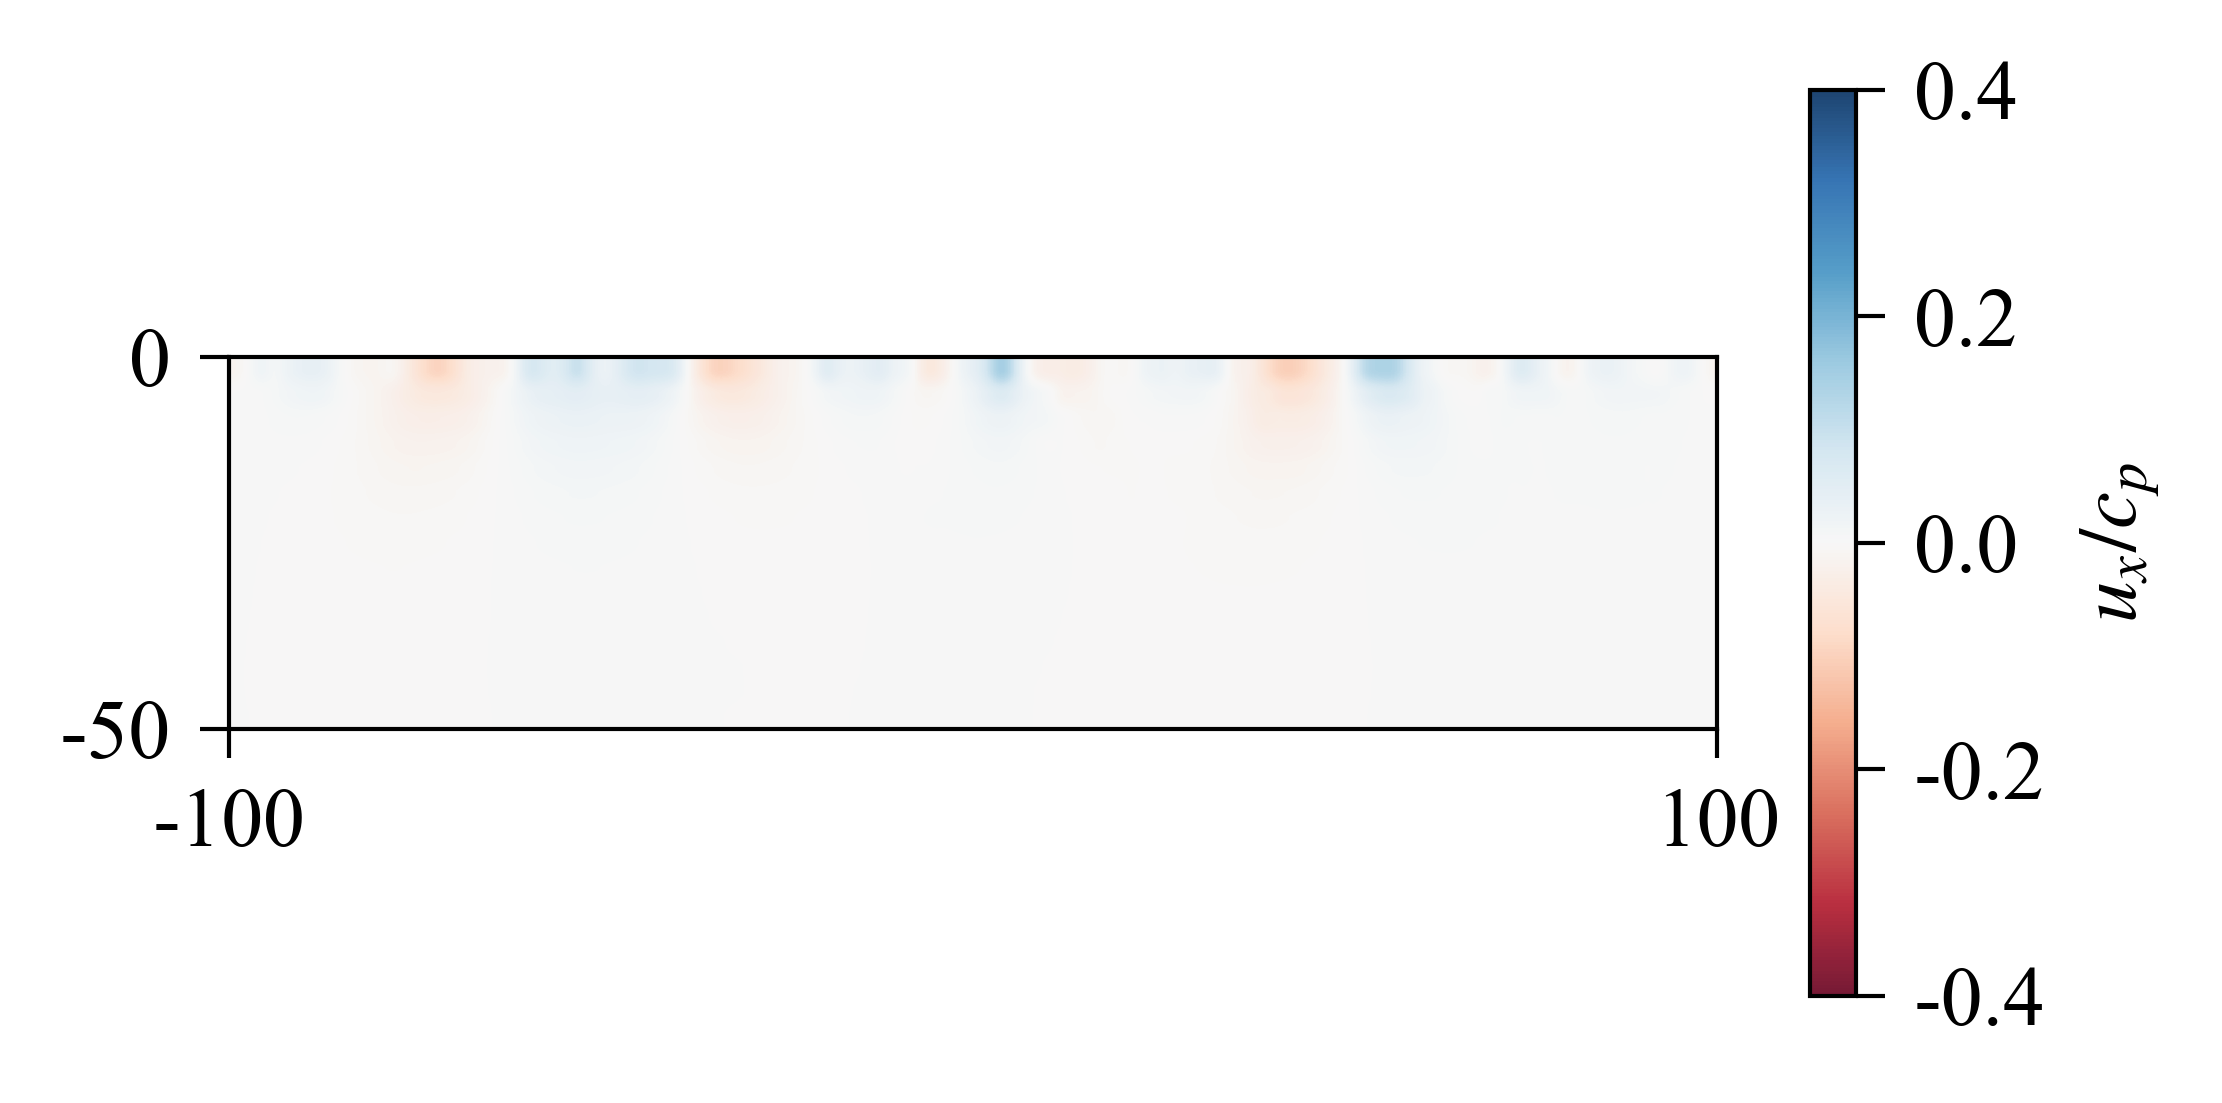

In [26]:
L = 200; H = 50
fig = plt.figure(figsize=[4,2]); ax = plt.gca()
kp = 2*np.pi/L*5; cp = (9.8/kp)**0.5 
image = ax.imshow((ux_ensem2[::-1,:,30])/cp, extent=[-L/2,L/2,-H,0], vmax=0.4, vmin=-0.4, cmap='RdBu', alpha=0.9)
ax.set_xticks([-L/2,L/2]); ax.set_yticks([-H,0])
cbar = plt.colorbar(image)
cbar.set_label(r'$u_x/c_p$')

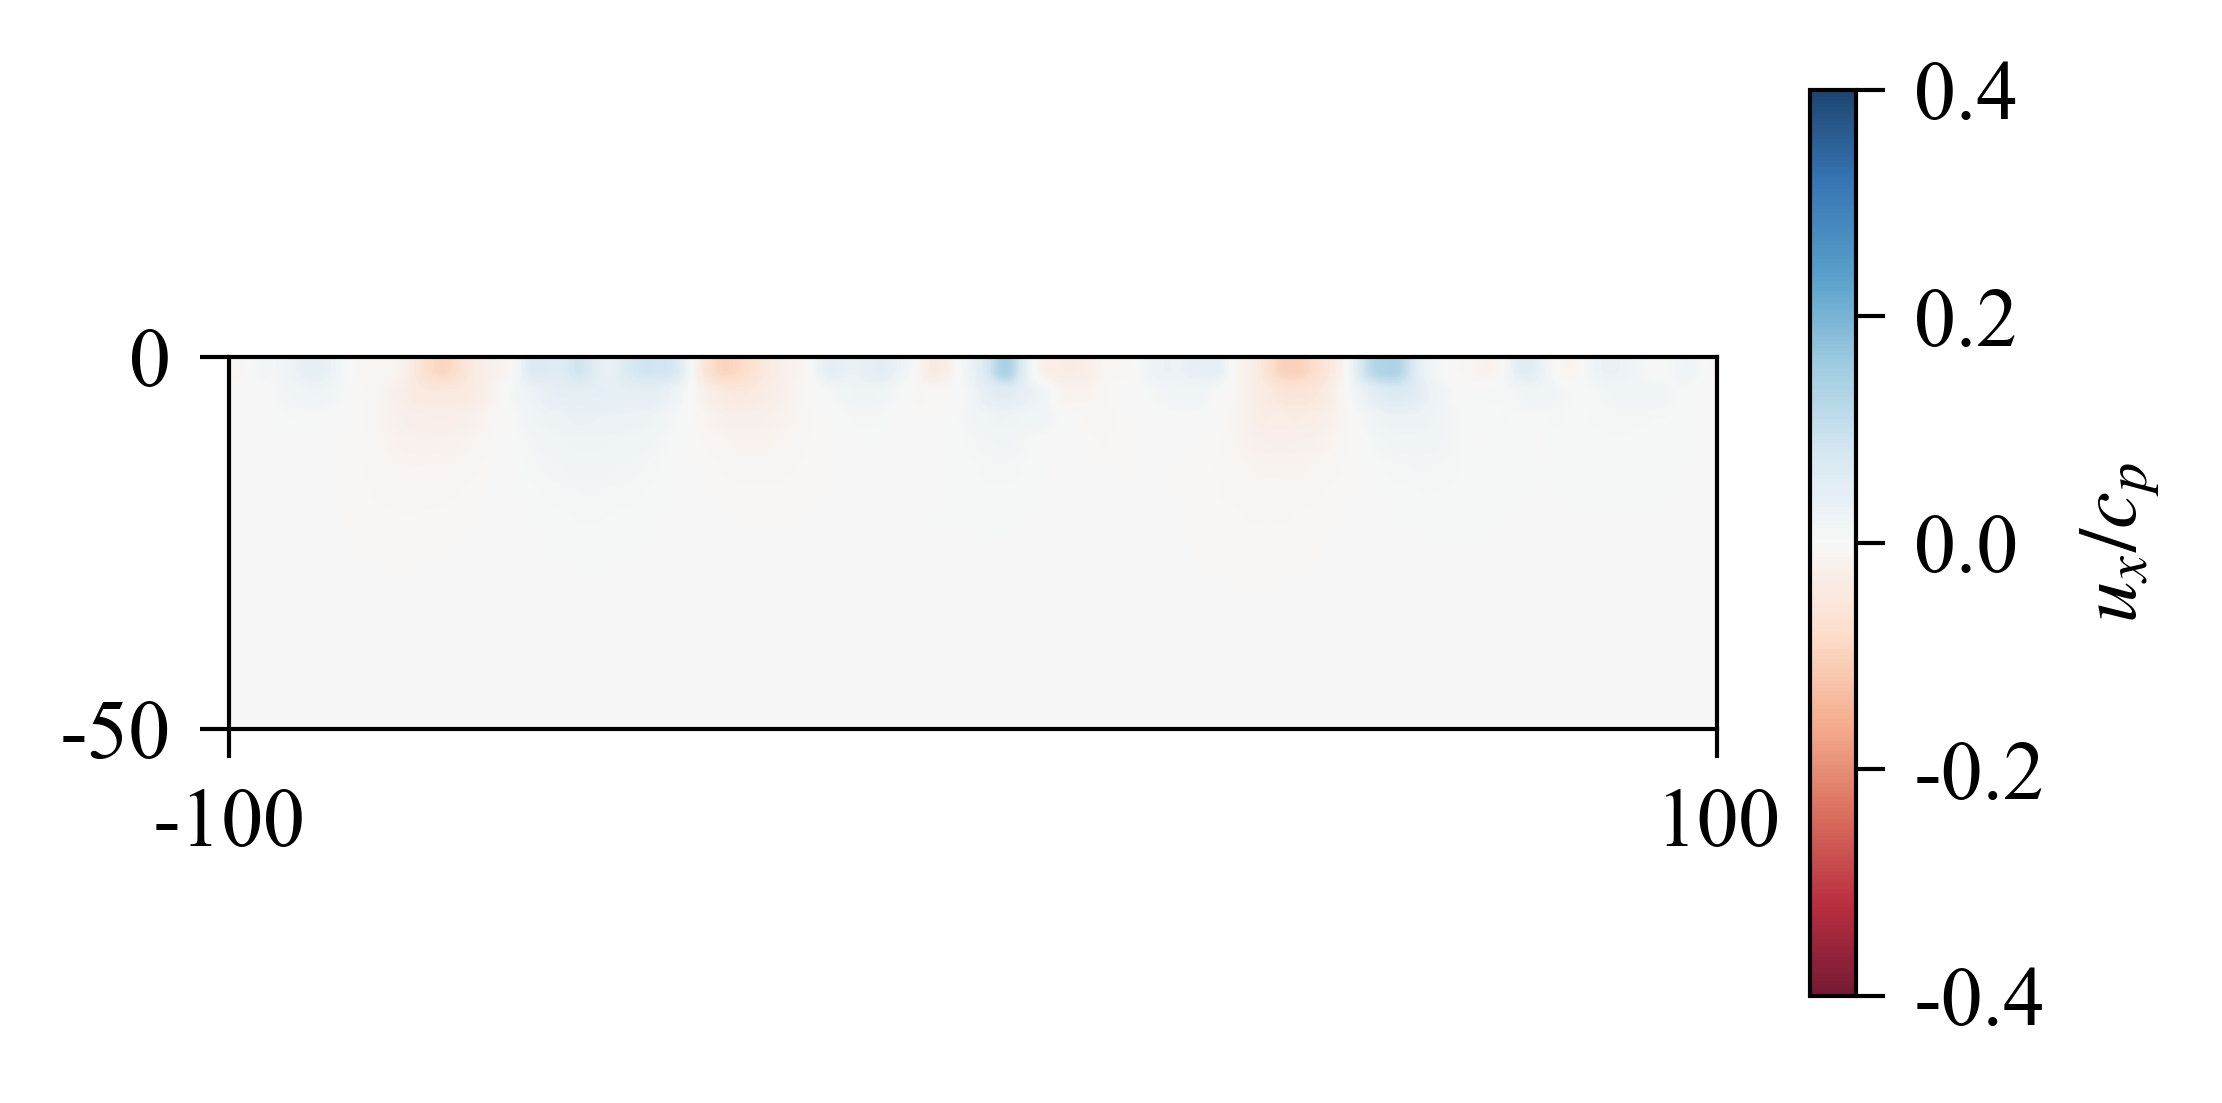

In [27]:
L = 200; H = 50
fig = plt.figure(figsize=[4,2]); ax = plt.gca()
kp = 2*np.pi/L*5; cp = (9.8/kp)**0.5 
image = ax.imshow((ux_ensem3[::-1,:,30])/cp, extent=[-L/2,L/2,-H,0], vmax=0.4, vmin=-0.4, cmap='RdBu', alpha=0.9)
ax.set_xticks([-L/2,L/2]); ax.set_yticks([-H,0])
cbar = plt.colorbar(image)
cbar.set_label(r'$u_x/c_p$')

In [28]:
def read(name, skip = None):
    energy,exists = readin(path+name, table_delimiter = ' ', 
                       table_headers = ['t', 'ke', 'gpe'], skipn = skip)
    if exists:
        total = energy.ke + energy.gpe 
    energy.insert(len(energy.columns), "total", total, True)
    return energy
def plot(ax,energy,tag=' ',line='-'):
    ax.set_prop_cycle(None)
    ax.plot(energy.t, energy.ke, label='ke '+tag, linestyle=line)
    ax.plot(energy.t, energy.gpe, label='gpe '+tag, linestyle=line)
    ax.plot(energy.t, energy.total/2, label='total/2 '+tag, linestyle=line)

/tmp/ipykernel_262866/3129731012.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  energy,exists = readin(path+name, table_delimiter = ' ',


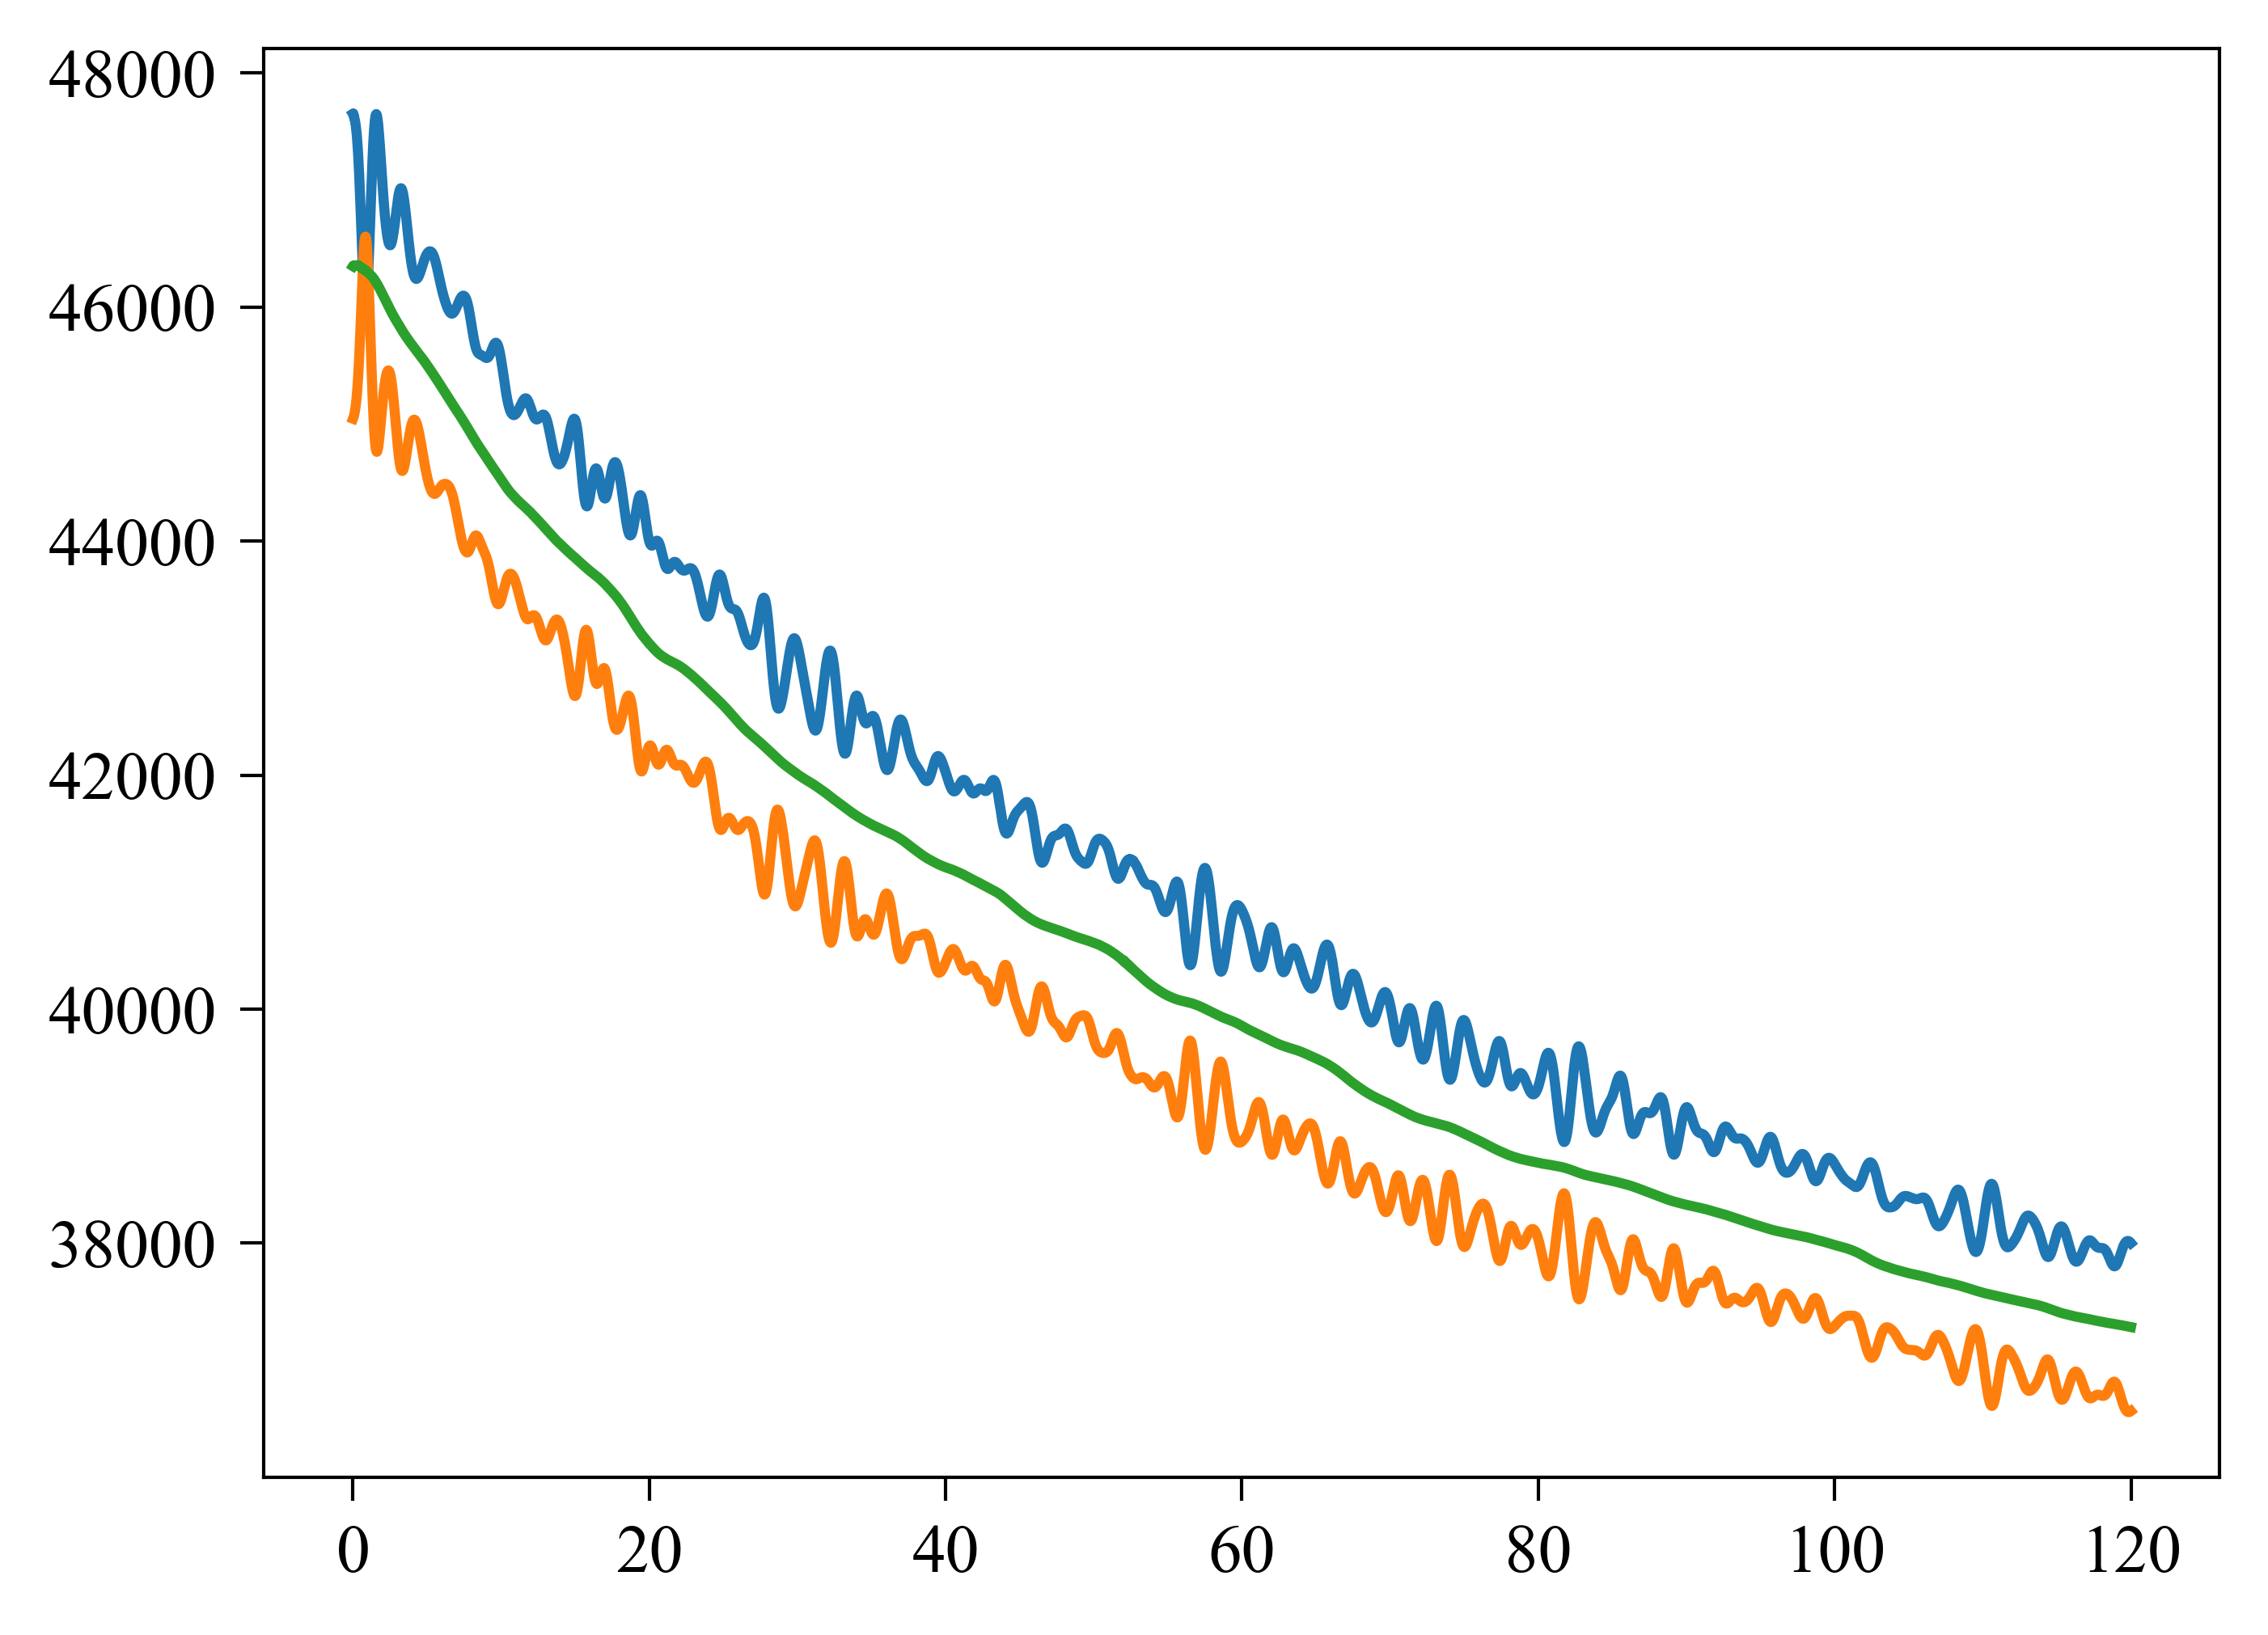

In [34]:
path = '/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.03_RE40000_9_15_rand2_Htheta0.503/'
# path = '/home/jiarong/research/projects/multilayer/field_init_test_P0010_RE40000/'
fig = plt.figure(); ax = fig.gca()
energy1 = read('energy_before_remap.dat')
plot(ax,energy1,'exponential 30 layers')